Aaron Leung

In [3]:
import pandas as pd


!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-02-07 23:44:06--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K   652KB/s    in 0.3s    

2023-02-07 23:44:07 (652 KB/s) - ‘abalone.csv’ saved [191962/191962]



# Read in Abalone data

In [4]:
df = pd.read_csv("abalone.csv")

# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [5]:
# display dataframe
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
# remove column since it is not numerical
df = df.drop(columns=["Sex"])

In [7]:
# updated dataframe with removed column
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
"""
Preprocess data using z-score normalization
Will use scipy.stats to calculate score and convert dataframe columns to zscore using .apply()
"""
import scipy.stats as stats

df_normalized = df. apply(stats.zscore)

# display dataframe with zscores
df_normalized

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [9]:
"""
Convert dataframe to numpy array
"""
import numpy as np

matrix = df_normalized.to_numpy()
matrix

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [10]:
"""
Create covariance matrix, covariance matrix is 8 x 8
"""
# create covariance matrix 
cov_matrix = np.cov(matrix.T)

# display covariance matrix
cov_matrix

array([[1.00023946, 0.98704789, 0.82775178, 0.92548274, 0.89812868,
        0.90323394, 0.89792054, 0.55685289],
       [0.98704789, 1.00023946, 0.83388332, 0.92567371, 0.89337636,
        0.89993988, 0.90554657, 0.57479746],
       [0.82775178, 0.83388332, 1.00023946, 0.81941695, 0.77515787,
        0.79851047, 0.81753374, 0.55760082],
       [0.92548274, 0.92567371, 0.81941695, 1.00023946, 0.96963759,
        0.96660649, 0.95558422, 0.54051908],
       [0.89812868, 0.89337636, 0.77515787, 0.96963759, 1.00023946,
        0.93218449, 0.88282841, 0.42098444],
       [0.90323394, 0.89993988, 0.79851047, 0.96660649, 0.93218449,
        1.00023946, 0.90787367, 0.5039399 ],
       [0.89792054, 0.90554657, 0.81753374, 0.95558422, 0.88282841,
        0.90787367, 1.00023946, 0.62772433],
       [0.55685289, 0.57479746, 0.55760082, 0.54051908, 0.42098444,
        0.5039399 , 0.62772433, 1.00023946]])

In [11]:
cov_matrix.shape

(8, 8)

In [12]:
# calculate eigval and eigvec of covariance matrix (calculating main direction)
eigval, eigvec = np.linalg.eig(cov_matrix)

# Print Eigenvectors and Eigenvalues
print("Eigenvectors")
eigvec

Eigenvectors


array([[ 3.72138505e-01,  6.82826958e-02,  3.10703159e-02,
        -6.04053517e-01,  6.98825733e-01, -1.63485531e-02,
        -4.74968278e-02,  1.11248478e-02],
       [ 3.73094111e-01,  4.00480412e-02,  4.10050673e-02,
        -5.87594701e-01, -7.12985166e-01,  2.19254893e-04,
        -2.33754046e-02, -5.79110156e-02],
       [ 3.40026777e-01, -7.04631477e-02,  8.99705624e-01,
         2.56777039e-01,  8.61445194e-03, -2.68817140e-03,
         2.66914622e-02,  5.67292650e-02],
       [ 3.78307478e-01,  1.37346192e-01, -2.06193609e-01,
         2.41848954e-01, -8.33128844e-03, -8.50264371e-01,
         1.17255046e-01, -1.56556128e-02],
       [ 3.62454487e-01,  2.98839921e-01, -2.08286301e-01,
         1.83245659e-01, -9.28176619e-03,  3.91100542e-01,
         6.24892864e-01,  3.98525300e-01],
       [ 3.68557801e-01,  1.72978517e-01, -1.97379538e-01,
         2.65220563e-01, -2.73455394e-02,  2.04179031e-01,
        -7.65843810e-01,  3.09821489e-01],
       [ 3.70757823e-01, -4.540040

In [13]:
print(len(eigvec))

8


In [14]:
print("Eigenvalues:")
eigval

Eigenvalues:


array([6.71404654e+00, 6.95779541e-01, 2.58505008e-01, 1.66029591e-01,
       1.26972036e-02, 6.39985662e-03, 6.34879663e-02, 8.49700060e-02])

In [15]:
print(len(eigval))

8


In [16]:
"""
Now we need to select the principal components.
We need to choose which eigenvectors can be dropped without losing too much information.  In order to do this, we will sort the eigenvalues
from highest to lowest then choose the top eigenvector.
"""
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigval[i]), eigvec[:,i]) for i in range(len(eigval))]

# Sort the (eigenvalue, eigenvector) tuples by eigenvalue in descending order
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Display list eigenvalues in descending order
print('Eigenvalues in descending order:')
for pair in eigen_pairs:
    print(pair[0])

Eigenvalues in descending order:
6.714046535594115
0.6957795408508028
0.25850500829489004
0.16602959147764437
0.08497000602296031
0.06348796631816032
0.012697203638090437
0.006399856615600954


In [17]:
"""
Pick top k (in this case: 2) features with respect to top k eigenvalues
Printing out both pairs
"""
print("First top eigen pair:")
print(eigen_pairs[0])

print("Second top eigen pair:")
print(eigen_pairs[1])

First top eigen pair:
(6.714046535594115, array([0.3721385 , 0.37309411, 0.34002678, 0.37830748, 0.36245449,
       0.3685578 , 0.37075782, 0.24271277]))
Second top eigen pair:
(0.6957795408508028, array([ 0.0682827 ,  0.04004804, -0.07046315,  0.13734619,  0.29883992,
        0.17297852, -0.0454004 , -0.92120385]))


In [18]:
"""
Converting eigvec to array 
"""
eigvecs_sorted = np.array([x[1] for x in eigen_pairs])
eigvecs_sorted

array([[ 3.72138505e-01,  3.73094111e-01,  3.40026777e-01,
         3.78307478e-01,  3.62454487e-01,  3.68557801e-01,
         3.70757823e-01,  2.42712772e-01],
       [ 6.82826958e-02,  4.00480412e-02, -7.04631477e-02,
         1.37346192e-01,  2.98839921e-01,  1.72978517e-01,
        -4.54004049e-02, -9.21203850e-01],
       [ 3.10703159e-02,  4.10050673e-02,  8.99705624e-01,
        -2.06193609e-01, -2.08286301e-01, -1.97379538e-01,
        -1.61574078e-01, -1.92143588e-01],
       [-6.04053517e-01, -5.87594701e-01,  2.56777039e-01,
         2.41848954e-01,  1.83245659e-01,  2.65220563e-01,
         2.44192067e-01,  4.33101254e-02],
       [ 1.11248478e-02, -5.79110156e-02,  5.67292650e-02,
        -1.56556128e-02,  3.98525300e-01,  3.09821489e-01,
        -8.30563767e-01,  2.20025690e-01],
       [-4.74968278e-02, -2.33754046e-02,  2.66914622e-02,
         1.17255046e-01,  6.24892864e-01, -7.65843810e-01,
         3.28323476e-02,  6.81957909e-02],
       [ 6.98825733e-01, -7.129851

In [19]:
"""
Construct projection matrix W from the selected 2 eigenvectors
"""
matrix_W = eigvecs_sorted[:2, :]
matrix_W

array([[ 0.3721385 ,  0.37309411,  0.34002678,  0.37830748,  0.36245449,
         0.3685578 ,  0.37075782,  0.24271277],
       [ 0.0682827 ,  0.04004804, -0.07046315,  0.13734619,  0.29883992,
         0.17297852, -0.0454004 , -0.92120385]])

In [20]:
print(matrix_W.shape)

(2, 8)


In [21]:
"""
Projection onto new feature space
[:,] = [first row: last row], column 0
"""
matrix_project = matrix.dot(matrix_W.T)
print(matrix_project.shape)

(4177, 2)


In [22]:
x = matrix_project[:, 0]
x

array([-1.32291442, -3.48365134, -0.53616125, ...,  2.03301641,
        1.60123963,  4.89861662])

In [23]:
y = matrix_project[:, 1]
y

array([-1.79565502,  0.09283156,  0.04940728, ...,  0.69391768,
        0.46575061,  0.80973552])

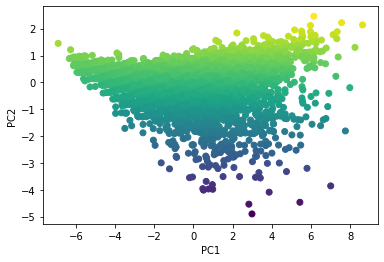

In [24]:
"""
Create scatter plot to view data in 2D
[:,] = [first row: last row], column 0
"""
import matplotlib.pyplot as plt

plt.scatter(x, y, c=y)
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.show()

In [25]:
"""
Experimenting with sklearn
"""
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(df)

# Access values and vectors
print("pca components")
print(pca.components_)
print("explained variance")
print(pca.explained_variance_)

# transform data
B = pca.transform(df)
print("B")
print(B)

pca components
[[ 0.02105132  0.01794012  0.0073163   0.08368049  0.02973466  0.01745992
   0.02743115  0.99510682]
 [ 0.18305275  0.14880419  0.05245956  0.83446131  0.3999516   0.18325279
   0.20527245 -0.0979371 ]]
explained variance
[10.49543138  0.23926882]
B
[[ 5.00480331 -0.86692655]
 [-2.99106199 -0.43457164]
 [-0.94603495 -0.08673867]
 ...
 [-0.88806992  0.5087862 ]
 [ 0.0998919   0.34089986]
 [ 2.18474351  1.11378693]]
